# Satellite Imagery Analysis

In this exercise I will be analyzing images collected by satellites. Specifically over Sundarbans forest in India. The Sundarbans forest stretches for approximately 10,000 km sq across India, Bangladesh, which about 40% is found in India, this task will only be analyzing a very small portion of the Sundarbans satellite data that is acquired using the Sentinel-2 satellite. 

> Dataset I am using is in the form of 954*928 pixels, with 12 bands with a spectral resolution varying from 10 to 60 meters. 

## Imports

In [5]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [6]:
S_sentinel_bands = glob('*B*?*.tiff')

In [7]:
S_sentinel_bands.sort()

# Visualizing 12 bands

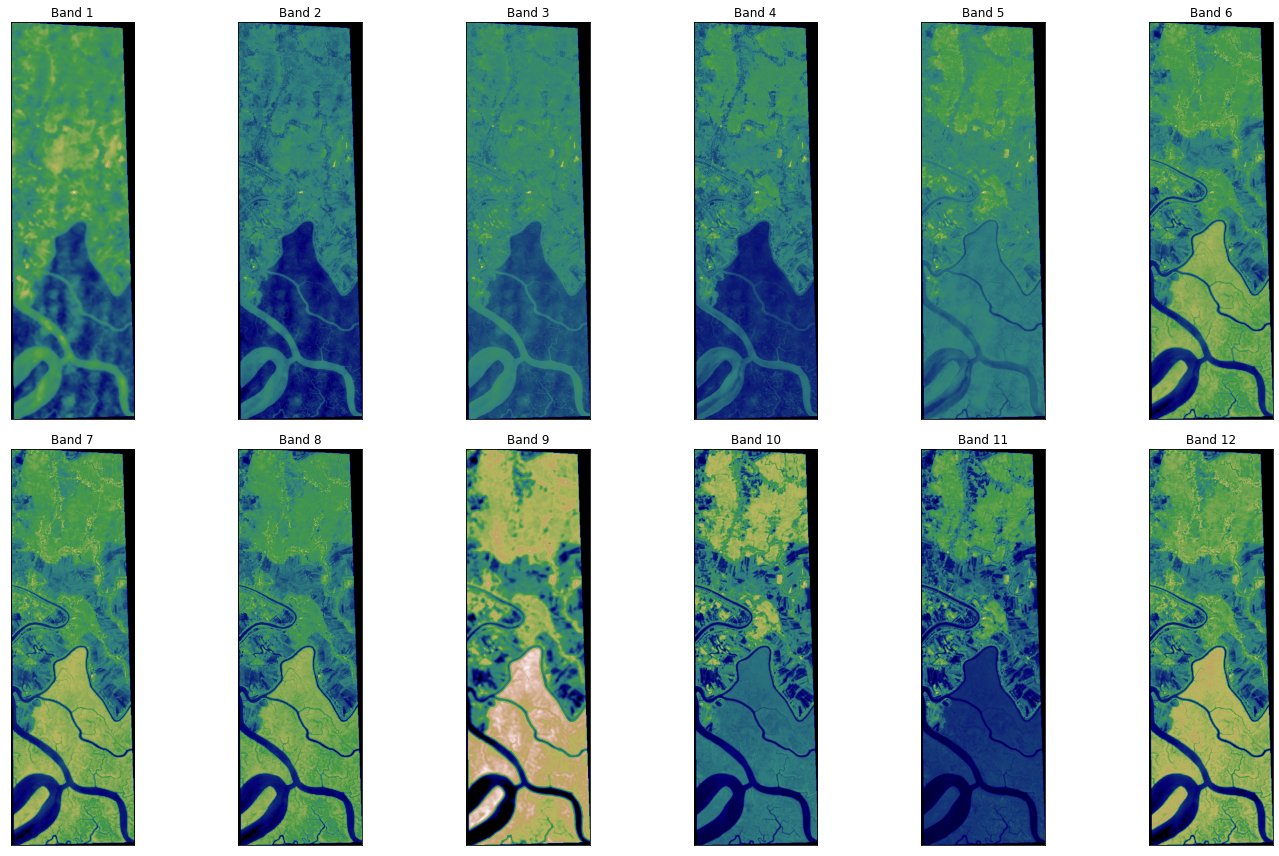

In [8]:
l = []
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))
arr_st = np.stack(l)
ep.plot_bands(arr_st, cmap='gist_earth', figsize= (20, 12), cols=6, cbar=False)
plt.show()

> Dataset has several numbers of bands that contain data ranging from visible to infrared. It is therefore difficult for humans to really visualize the data. Creating an RGB composite image facilitates and better understanding of the data.

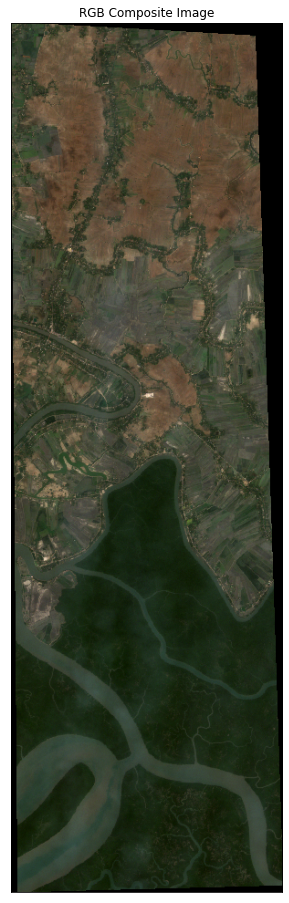

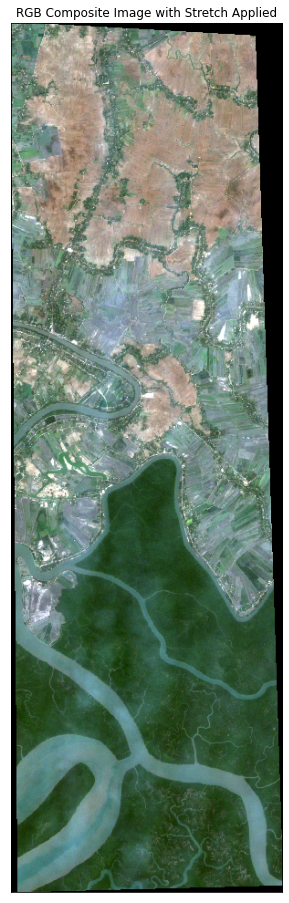

In [10]:
rgb = ep.plot_rgb(arr_st,
                  rgb=(3,2,1),
                  figsize=(10,16),
                  title = 'RGB Composite Image')
plt.show()

ep.plot_rgb(arr_st,
            rgb=(3, 2, 1), 
            stretch= True,
            str_clip=0.2,
            figsize=(10,16),
            title= 'RGB Composite Image with Stretch Applied')
plt.show()

> Now visualizing the histogram of the dataset, which helps in understanding the distribution of the values of the bands

# Analyzing  Vegetation Index

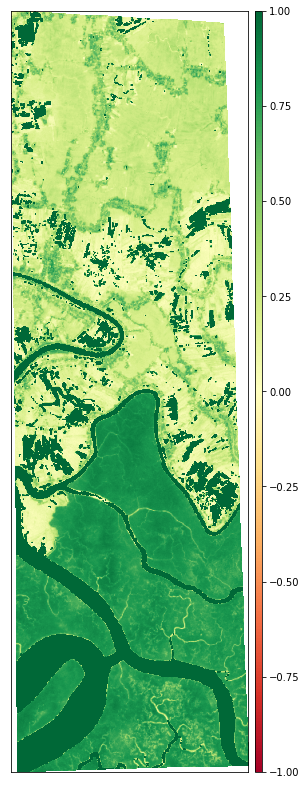

In [12]:
ndvi = es.normalized_diff(arr_st[7], arr_st[3])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10,14))
plt.show()

> - When values are negative it is probably water
> - If you have a value close to +1, it may be dense green leaves.
> - If you have a value close to 0, there are no green leaves and it might be an urbanized area

# Conclusion

This type of analysis would be so grateful for uses in determining the effects of urbanization and deforestation